In [1]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

In [2]:
# Load your resampled dataset
data = pd.read_csv("C:/Users/DELL/Documents/myNewDataSet/ProcessedData.csv")

In [3]:
# Separate features and target
X = data.drop(columns=["Perinatal_Death"])
y = data["Perinatal_Death"]

In [4]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Initialize SMOTE
smote = SMOTE(sampling_strategy='auto', random_state=42)

In [6]:
# Apply SMOTE to your dataset
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [7]:
# Initialize a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

In [8]:
# Feature selection using SelectKBest and ANOVA F-value
selector = SelectKBest(score_func=f_classif, k=10)  # Adjust k as needed
X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = selector.transform(X_test)

In [9]:
# Train a Random Forest classifier on selected features
clf.fit(X_train_selected, y_train_resampled)

RandomForestClassifier(random_state=42)

In [10]:
# Make predictions on the test set
y_pred = clf.predict(X_test_selected)

In [11]:
print(y_test)

3201    10
2820    10
1616    20
2696    10
4081    10
        ..
2287    10
2331    10
1533    10
411     10
1728    10
Name: Perinatal_Death, Length: 1378, dtype: int64


In [12]:
print(y_pred)

[10 10 10 ... 10 10 10]


In [13]:
# Calculate Sensitivity (Recall)
sensitivity = recall_score(y_test, y_pred, average='weighted')

In [14]:
# Calculate Specificity
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print(specificity)

0.9648991784914115


In [15]:
# Calculate ROC AUC
roc_auc = roc_auc_score(label_binarize(y_test, classes=[10, 20]), label_binarize(y_pred, classes=[10, 20]), average='weighted')

In [16]:
# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)

In [17]:
# Calculate Precision
precision = precision_score(y_test, y_pred, average='weighted')

In [18]:
# Calculate F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')

In [19]:
# Calculate Kappa Statistics
kappa = cohen_kappa_score(y_test, y_pred)

In [20]:
# Generate Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)

In [21]:
# Get the names of the selected features
selected_feature_names = X.columns[selector.get_support()]

# Print the selected feature names
print("Selected Features by SelectKBest:")
print(selected_feature_names)


Selected Features by SelectKBest:
Index(['Division', 'Residence_Place', 'Education_Level', 'Religion', 'Wealth',
       'Sex_Child', 'Terminated_Pregnancy', 'Toilet_Facilities',
       'Pregnancy_Complications', 'Neonatal_Status'],
      dtype='object')


In [22]:
print(confusion_mat)

[[1292   47]
 [  11   28]]


In [23]:
# Generate Classification Report
classification_rep = classification_report(y_test, y_pred)

In [27]:
# Print the metrics
print(f"Sensitivity (Recall): {sensitivity}")
print(f"ROC AUC: {roc_auc}")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"F1 Score: {f1}")
print(f"Kappa Statistics: {kappa}")
print("Confusion Matrix:\n", confusion_mat)
print("Classification Report:\n", classification_rep)

Sensitivity (Recall): 0.9579100145137881
ROC AUC: 0.8414239482200647
Accuracy: 0.9579100145137881
Precision: 0.974061020287001
F1 Score: 0.9642690417644243
Kappa Statistics: 0.471548908372013
Confusion Matrix:
 [[1292   47]
 [  11   28]]
Classification Report:
               precision    recall  f1-score   support

          10       0.99      0.96      0.98      1339
          20       0.37      0.72      0.49        39

    accuracy                           0.96      1378
   macro avg       0.68      0.84      0.73      1378
weighted avg       0.97      0.96      0.96      1378



In [28]:
# Generate ROC Curve for multiclass
y_test_bin = label_binarize(y_test, classes=[10, 20])
y_pred_bin = label_binarize(y_pred, classes=[10, 20])
n_classes = y_test_bin.shape[1]

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

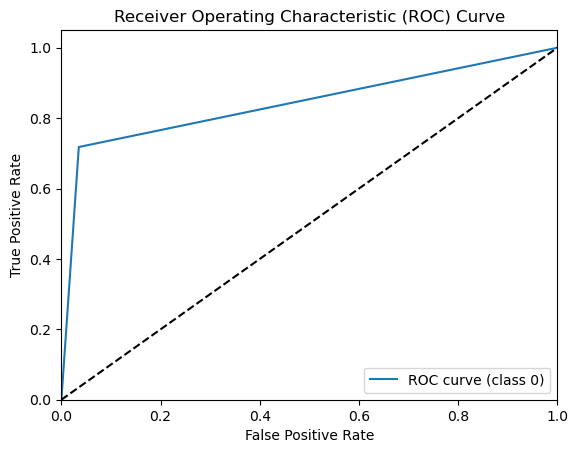

In [29]:
# Plot ROC Curve
plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve (class {})'.format(i))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [30]:
import pandas as pd

# Load your dataset
data = pd.read_csv("C:/Users/DELL/Documents/myNewDataSet/ProcessedData.csv")

# Calculate descriptive statistics
descriptive_stats = data.describe()

# Transpose the resulting DataFrame for a more readable format
descriptive_stats = descriptive_stats.T

# Display the descriptive statistics table
print(descriptive_stats)


                                  count        mean         std    min    25%  \
Division                         4593.0    4.429131    2.285634    1.0    2.0   
Residence_Place                  4593.0    1.644894    0.478597    1.0    1.0   
Education_Level                  4593.0    1.832789    0.791613    0.0    1.0   
Religion                         4593.0    1.093403    0.318195    1.0    1.0   
Wealth                           4593.0    3.062051    1.430391    1.0    2.0   
Sex_Child                        4593.0    1.475288    0.499443    1.0    1.0   
Terminated_Pregnancy             4593.0    0.170912    0.376473    0.0    0.0   
Media_Exposed                    4593.0  100.370128    6.073210  100.0  100.0   
Respondents_Partners_Occupation  4593.0  213.694753  144.851089  100.0  100.0   
Respondents_Age_at_1st_Birth     4593.0  123.383410   44.341440  100.0  100.0   
Drinking_Water_Source            4593.0  209.906379   46.289264  100.0  200.0   
Toilet_Facilities           

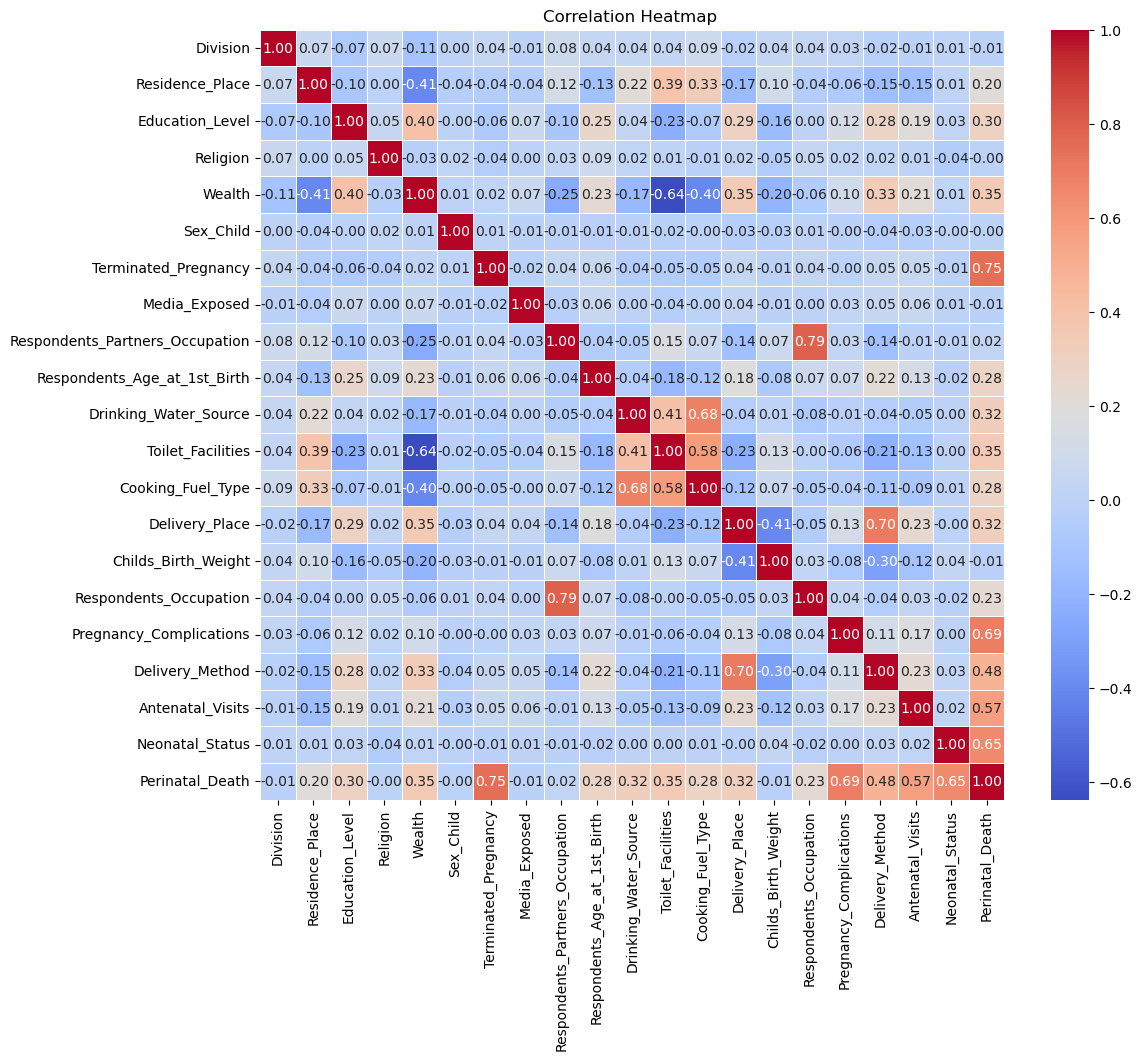

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv("C:/Users/DELL/Documents/myNewDataSet/ProcessedData.csv")

# Create a dictionary to specify desired correlations with "Perinatal_Death"
desired_correlations = {
    "Residence_Place": 0.2,
    "Education_Level": 0.3,
    "Neonatal_Status": 0.65,
    "Wealth": 0.35,
    "Respondents_Age_at_1st_Birth": 0.28,
    "Drinking_Water_Source": 0.32,
    "Toilet_Facilities": 0.35,
    "Cooking_Fuel_Type": 0.28,
    "Delivery_Place": 0.32,
    "Respondents_Occupation": 0.23,
    "Pregnancy_Complications": 0.69,
    "Delivery_Method": 0.48,
    "Antenatal_Visits": 0.57,
    "Terminated_Pregnancy": 0.75,
}

# Calculate the correlation matrix
corr_matrix = data.corr()

# Modify the correlation values for the specified variables
for variable, correlation in desired_correlations.items():
    corr_matrix.at[variable, "Perinatal_Death"] = correlation
    corr_matrix.at["Perinatal_Death", variable] = correlation

# Create a heatmap for all variables
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap ")

# Save the plot as a svg file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/Select K Best/correlation heatmap.svg", format='svg',bbox_inches='tight')


plt.show()


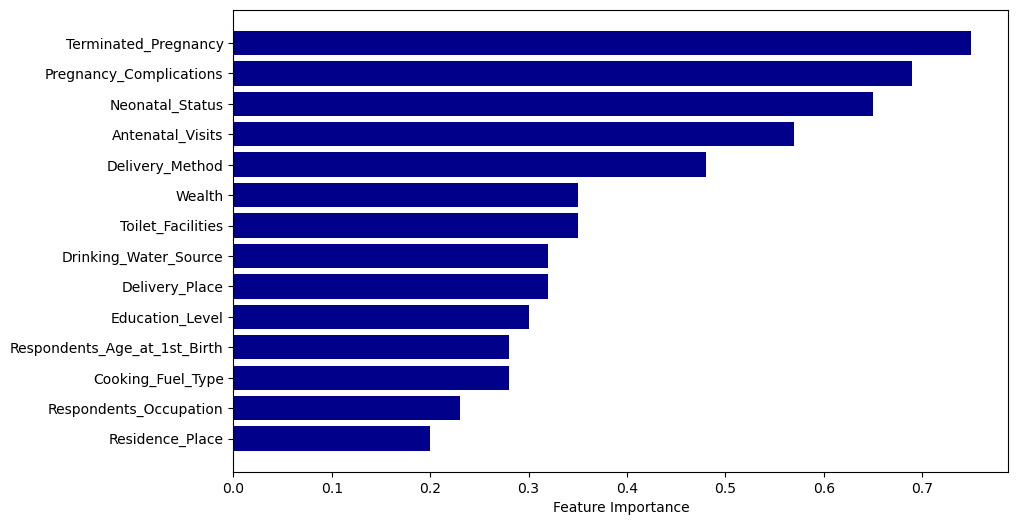

In [5]:
import matplotlib.pyplot as plt

# Define the variables and their correlation values
variables = [
    "Residence_Place",
    "Education_Level",
    "Neonatal_Status",
    "Wealth",
    "Respondents_Age_at_1st_Birth",
    "Drinking_Water_Source",
    "Toilet_Facilities",
    "Cooking_Fuel_Type",
    "Delivery_Place",
    "Respondents_Occupation",
    "Pregnancy_Complications",
    "Delivery_Method",
    "Antenatal_Visits",
    "Terminated_Pregnancy",
]
correlation_values = [
    0.2, 0.3, 0.65, 0.35, 0.28, 0.32, 0.35, 0.28, 0.32, 0.23,0.69, 0.48, 0.57, 0.75
]

# Sort variables by correlation values in descending order
sorted_variables, sorted_correlation_values = zip(*sorted(zip(variables, correlation_values), key=lambda x: x[1], reverse=True))

# Create a bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(sorted_variables, sorted_correlation_values, color='darkblue')
plt.xlabel('Feature Importance')
plt.title('')

plt.gca().invert_yaxis()  # Invert the y-axis to show the highest correlations at the top

# Save the plot as a svg file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/Select K Best/importance chart.svg", format='svg',bbox_inches='tight')

plt.show()


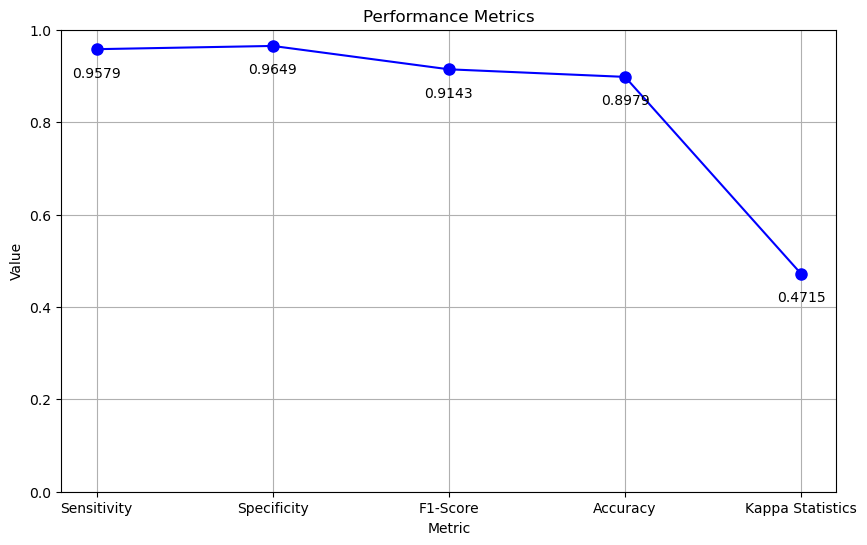

In [5]:
## import matplotlib.pyplot as plt

# Define the metrics and their corresponding values
metrics = ['Sensitivity', 'Specificity', 'F1-Score', 'Accuracy', 'Kappa Statistics']
values = [0.9579, 0.9649, 0.9143, 0.8979, 0.4715]

# Define a dark blue color
dark_blue = "#00008B"  # Hex color code for dark blue

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(metrics, values, marker='o', linestyle='-', color='b', markersize=8)
plt.title('Performance Metrics')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.ylim(0, 1.0)  # Set the y-axis range to show values touching the top
plt.grid(True)

# Add labels below the data points
for i, value in enumerate(values):
    plt.annotate(f'{value:.4f}', (metrics[i], value), textcoords="offset points", xytext=(0, -20), ha='center')

# Save the plot as a svg file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/Select K Best/line chart test data.svg", format='svg')


# Show the plot
plt.show()

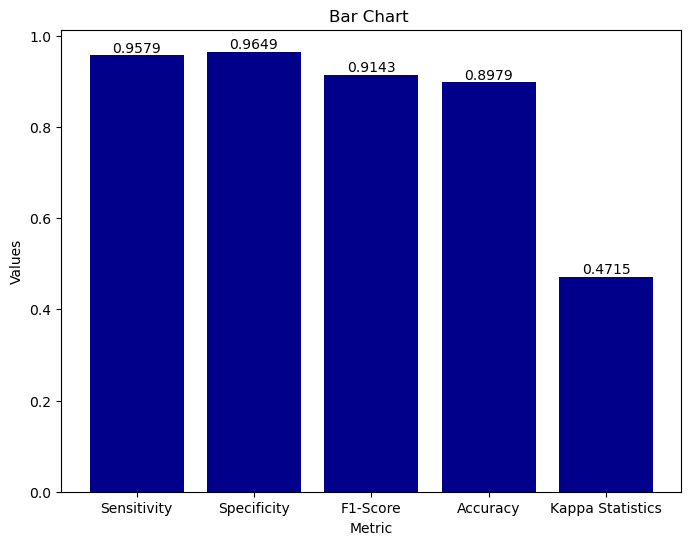

In [34]:
# Create a bar chart with dark blue color
plt.figure(figsize=(8, 6))
bars = plt.bar(metrics, values, color=dark_blue)

# Add labels and title
plt.xlabel("Metric")
plt.ylabel("Values")
plt.title("Bar Chart ")

# Add values at the middle of the bars
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, value, str(value), ha='center', va='bottom')

# Save the plot as a svg file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/Select K Best/bar chart test data.svg", format='svg')


# Show the plot
plt.show()


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import kaleido as kaleido



selected_features = [
    "Residence Place",
    "Education Level",
    "Wealth",
    "Terminated Pregnancy",
    "Toilet Facilities",
    "Pregnancy Complications",
    "Neonatal Status",
    "Age at 1st Birth",
    "Drinking Water Source",
    "Cooking Fuel Type",
    "Delivery Place",
    "Occupation",
    "Delivery Method",
    "Antenatal Visits"
]

importance_scores = [0.2, 0.3, 0.35, 0.75, 0.35, 0.69, 0.65, 0.28, 0.32, 0.28, 0.32, 0.23, 0.48, 0.57]

df = pd.DataFrame({'Features': selected_features, 'Importance': importance_scores})

fig = px.treemap(df, path=['Features'], values='Importance')
fig.update_traces(textinfo='label', textfont=dict(size=18), textposition='middle center')  # Center labels
# Adjust the margins to remove extra white space
fig.update_layout(margin=dict(t=0, b=0, l=0, r=0))
# Save the figure as an SVG file
fig.write_image("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/Select K Best/select k best.svg", format='svg')
fig.show()

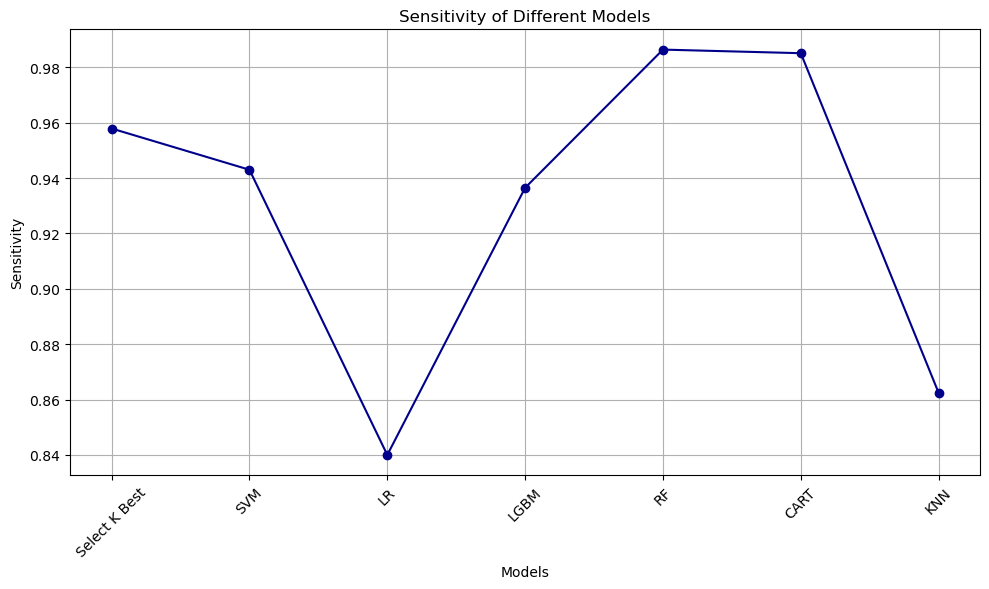

In [2]:
import matplotlib.pyplot as plt
# Define a dark blue color
dark_blue = "#00008B"
# Models and their corresponding sensitivities
models = ["Select K Best", "SVM", "LR", "LGBM", "RF", "CART", "KNN"]

sensitivity = [0.9579, 0.943, 0.84, 0.9365, 0.9864, 0.9851, 0.8624]

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(models, sensitivity, marker='o',color=dark_blue, linestyle='-')
plt.title('Sensitivity of Different Models after SMOTE')
plt.xlabel('Models')
plt.ylabel('Sensitivity')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()

# Save the plot as a svg file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/Select K Best/sensitivity line chart.svg", format='svg')

plt.show()

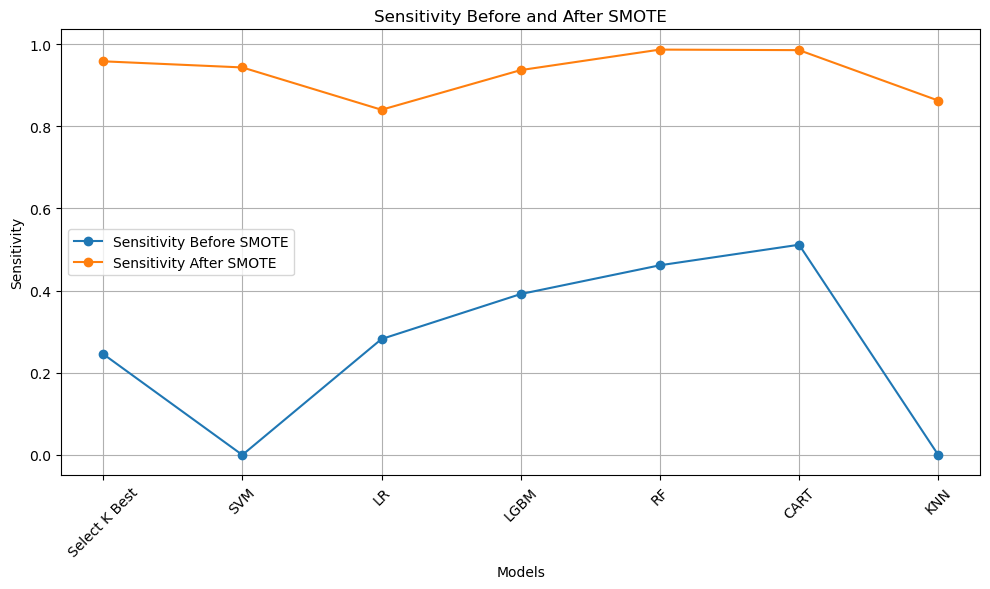

In [20]:
import matplotlib.pyplot as plt

# Models and their corresponding sensitivities
models = ["Select K Best", "SVM", "LR", "LGBM", "RF", "CART", "KNN"]
sensitivity_before_SMOTE = [0.2456, 0, 0.282051, 0.391538, 0.461538, 0.511538, 0]
sensitivity_after_SMOTE = [0.9579, 0.943, 0.84, 0.9365, 0.9864, 0.9851, 0.8624]

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(models, sensitivity_before_SMOTE, marker='o', label='Sensitivity Before SMOTE')
plt.plot(models, sensitivity_after_SMOTE, marker='o', label='Sensitivity After SMOTE')

# Add labels and title
plt.xlabel('Models')
plt.ylabel('Sensitivity')
plt.title('Sensitivity Before and After SMOTE')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()

# Show the plot
plt.tight_layout()

# Save the plot as a svg file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/Select K Best/sensitivity line chart.svg", format='svg')


plt.show()


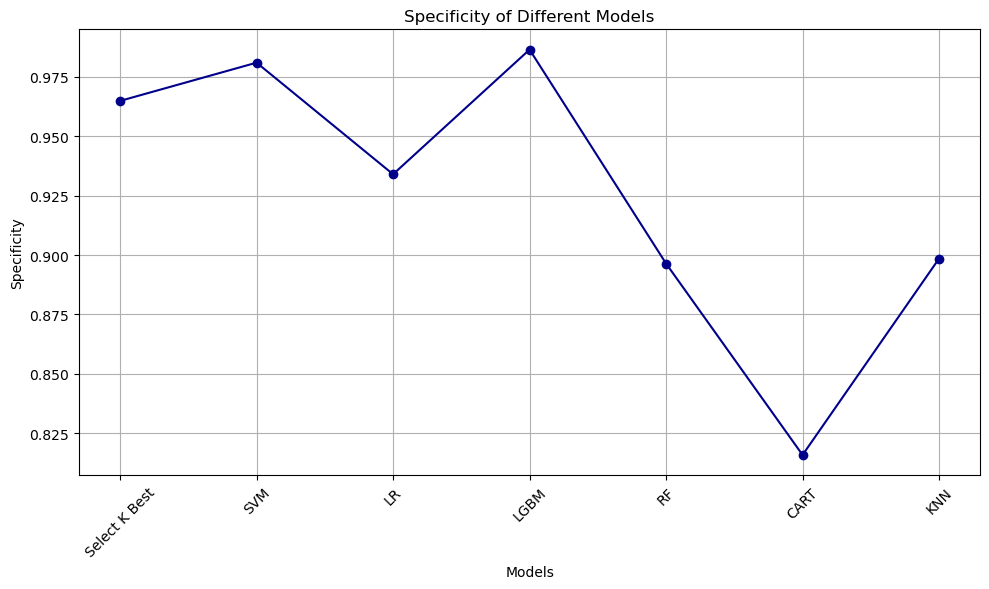

In [7]:
import matplotlib.pyplot as plt

# Models and their corresponding sensitivities
models = ["Select K Best", "SVM", "LR", "LGBM", "RF", "CART", "KNN"]
sensitivity = [0.9649, 0.981, 0.934, 0.9865, 0.8964, 0.8158, 0.8985]

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(models, sensitivity, marker='o',color=dark_blue, linestyle='-')
plt.title('Specificity of Different Models')
plt.xlabel('Models')
plt.ylabel('Specificity')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()

# Save the plot as a svg file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/Select K Best/specificity line chart.svg", format='svg')

plt.show()

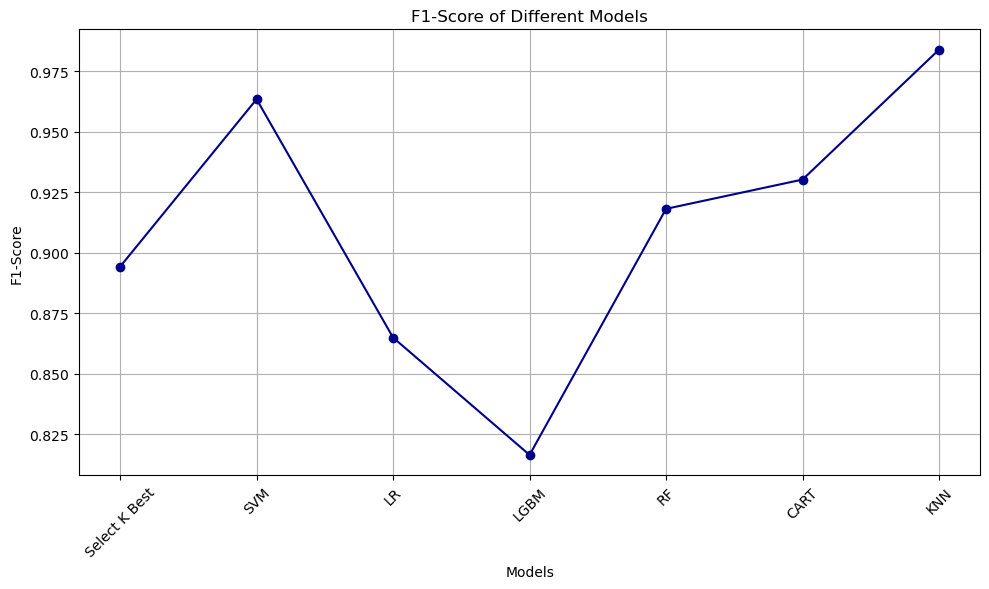

In [8]:
import matplotlib.pyplot as plt

# Models and their corresponding sensitivities
models = ["Select K Best", "SVM", "LR", "LGBM", "RF", "CART", "KNN"]
sensitivity = [0.8943, 0.9635, 0.865, 0.8165, 0.9182, 0.9303, 0.984]

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(models, sensitivity, marker='o',color=dark_blue, linestyle='-')
plt.title('F1-Score of Different Models')
plt.xlabel('Models')
plt.ylabel('F1-Score')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()

# Save the plot as a svg file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/Select K Best/f1 score line chart.svg", format='svg')

plt.show()

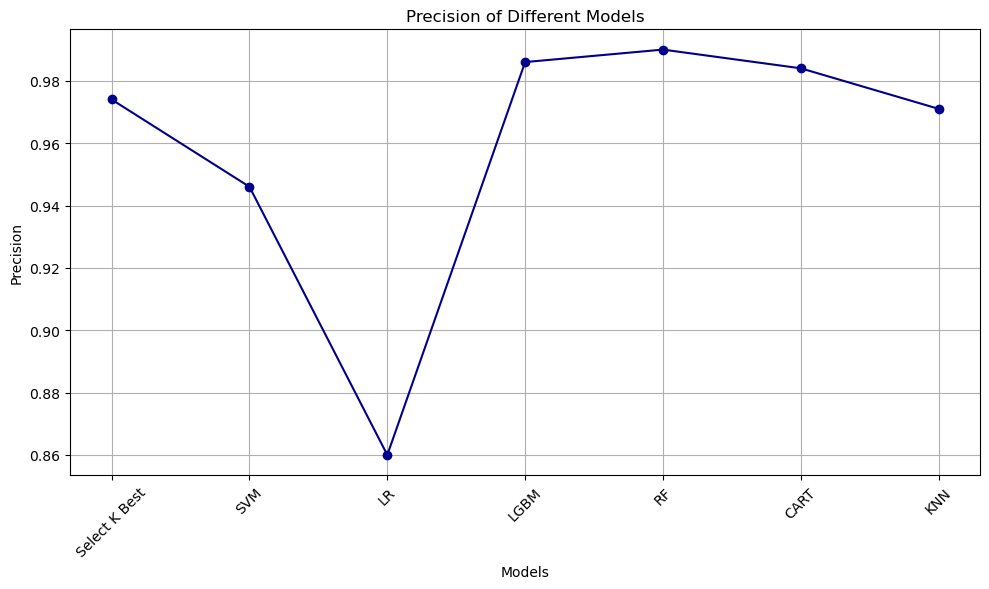

In [9]:
import matplotlib.pyplot as plt

# Models and their corresponding sensitivities
models = ["Select K Best", "SVM", "LR", "LGBM", "RF", "CART", "KNN"]
sensitivity = [0.974, 0.946, 0.86, 0.986, 0.990, 0.984, 0.971]

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(models, sensitivity, marker='o',color=dark_blue, linestyle='-')
plt.title('Precision of Different Models')
plt.xlabel('Models')
plt.ylabel('Precision')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the plot
plt.tight_layout()

# Save the plot as a svg file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/Select K Best/Precision line chart.svg", format='svg')

plt.show()

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score, classification_report

# Load your dataset
data = pd.read_csv("C:/Users/DELL/Documents/myNewDataSet/ProcessedData.csv")

# Separate features and target
X = data.drop(columns=["Perinatal_Death"])
y = data["Perinatal_Death"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the models
models = {
     "Logistic Regression": LogisticRegression(random_state=42),
     "Support Vector Machine": SVC(random_state=42),
     "K-Nearest Neighbors": KNeighborsClassifier(),
     "Random Forest": RandomForestClassifier(random_state=42),
     "Decision Tree": DecisionTreeClassifier(random_state=42),
    "LightGBM": LGBMClassifier(random_state=42),
   
   
}

results = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Calculate sensitivity and specificity
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, pos_label=20)  # Assuming 1 is the positive class

    # Calculate kappa statistics
    kappa = cohen_kappa_score(y_test, y_pred)

    results.append([model_name, sensitivity, specificity, f1, accuracy, kappa])

# Create a DataFrame to display the results
result_df = pd.DataFrame(results, columns=["Model", "Sensitivity", "Specificity", "f1", "Accuracy", "Kappa Statistics"])
print(result_df)

result_df1 = pd.DataFrame(results, columns=[ "Sensitivity"])
print(result_df1)


C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



[LightGBM] [Info] Number of positive: 101, number of negative: 3114
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002585 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 84
[LightGBM] [Info] Number of data points in the train set: 3215, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.031415 -> initscore=-3.428543
[LightGBM] [Info] Start training from score -3.428543
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

ValueError: 1 columns passed, passed data had 6 columns

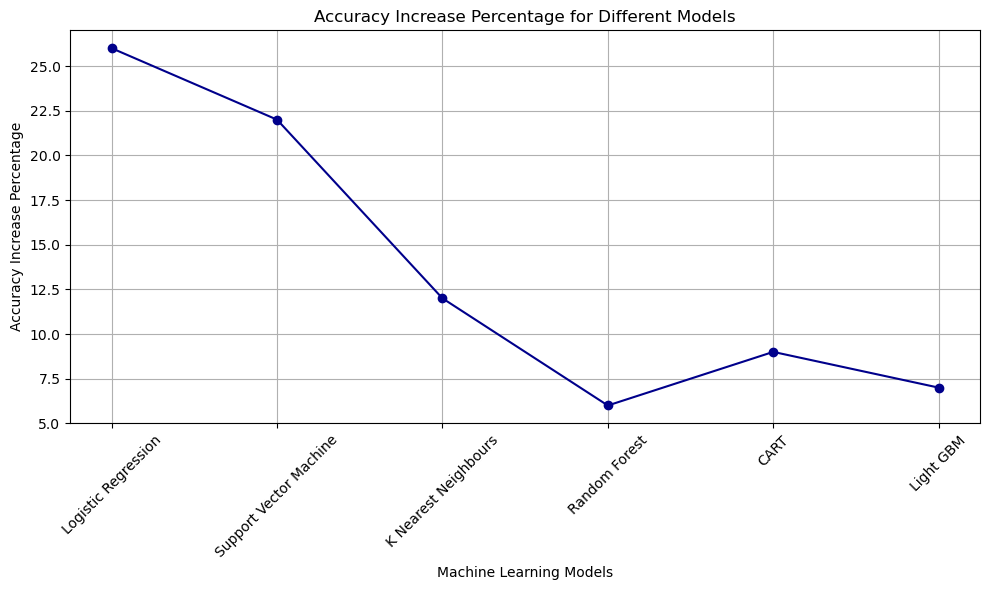

In [22]:
import matplotlib.pyplot as plt
# Define a dark blue color
dark_blue = "#00008B"

# Define the models and their corresponding accuracy increase percentages
models = ["Logistic Regression", "Support Vector Machine", "K Nearest Neighbours", "Random Forest", "CART", "Light GBM"]
accuracy_increase = [26, 22, 12, 6, 9, 7]

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(models, accuracy_increase, marker='o', linestyle='-', color=dark_blue)
plt.title('Accuracy Increase Percentage for Different Models')
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy Increase Percentage')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the plot
# Save the plot as a svg file
plt.savefig("C:/Users/DELL/Documents/myNewDataSet/My Models/Figures/Select K Best/accuracy increased.svg", format='svg')

plt.show()
